# Project 4: West Nile Virus in the City of Chicago

Michael Schillawski, 9 March 2018

Data Science Immersive, General Assembly

## 1. Setup

### 1.1 Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import pandas_profiling as pdp
from haversine import haversine

% matplotlib inline

/Users/mjschillawski/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/mjschillawski/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/mjschillawski/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/mjschillawski/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/mjschillawski/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/mjschillawski/anaconda3/lib/python3.6/site-pac

In [2]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

### 1.2 Gather Data

In [3]:
path = os.getcwd()

if path != '/Users/mjschillawski/Google Drive/Data/generalassembly/projects/west_nile_virus':
    path = '/Users/mjschillawski/Google Drive/Data/generalassembly/projects/west_nile_virus'
else:
    pass
path = path + '/assets/input'
os.chdir(path)

In [4]:
ls

Martinez-Prelim-EDA.ipynb
clean_test_data.csv
cleaned_data.csv*
mapdata_copyright_openstreetmap_contributors.rds
mapdata_copyright_openstreetmap_contributors.txt
noaa_weather_qclcd_documentation.pdf
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv


In [5]:
train = pd.read_csv('train.csv')
spray = pd.read_csv('spray.csv')
weather = pd.read_csv('weather.csv')
#test = pd.read_csv('test.csv')

## 2. Data Cleaning

### 2.1 Formatting & DeDuping

#### 2.1.1 Inspecting

In [6]:
def DataInspect(dataframe):
    '''Original function (previously called eda) created by Ritika Bhasker
       Good first step when starting any project. Provides overview of
       dataset including missing values, duplicates and types.
       Takes a Pandas dataframe as the argument.
       Modified by Michael Schillawski based on his preferences.'''
    print("Dataframe Shape:", dataframe.shape,"\n")
    print("Duplicate Rows:", dataframe.duplicated().sum(),"\n") #Added this
    print("Dataframe Types \n\n", dataframe.dtypes,"\n")    
    print("Missing Values \n\n", dataframe.isnull().sum(),"\n")
    print("Dataframe Describe \n\n", dataframe.describe(include='all'),"\n")


    print('Unique Values by Variable')
    for item in dataframe:
        print(item,':',dataframe[item].nunique())       

In [7]:
DataInspect(train)

Dataframe Shape: (10506, 12) 

Duplicate Rows: 813 

Dataframe Types 

 Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object 

Missing Values 

 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

Dataframe Describe 

               Date                                            Address  \
count        10506                      

In [8]:
DataInspect(spray)

Dataframe Shape: (14835, 4) 

Duplicate Rows: 541 

Dataframe Types 

 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

Missing Values 

 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

Dataframe Describe 

               Date        Time      Latitude     Longitude
count        14835       14251  14835.000000  14835.000000
unique          10        8583           NaN           NaN
top     2013-08-15  7:44:32 PM           NaN           NaN
freq          2668         541           NaN           NaN
mean           NaN         NaN     41.904828    -87.736690
std            NaN         NaN      0.104381      0.067292
min            NaN         NaN     41.713925    -88.096468
25%            NaN         NaN     41.785001    -87.794225
50%            NaN         NaN     41.940075    -87.727853
75%            NaN         NaN     41.980978    -87.694108
max            NaN         NaN     42.395983    -87.58672

In [9]:
DataInspect(weather)

Dataframe Shape: (2944, 22) 

Duplicate Rows: 0 

Dataframe Types 

 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

Missing Values 

 Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64 

Da

In [10]:
pdp.ProfileReport(train)

Number of variables,12
Number of observations,10506
Total Missing (%),0.0%
Total size in memory,985.0 KiB
Average record size in memory,96.0 B
Numeric,5
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [11]:
pdp.ProfileReport(spray)

Number of variables,4
Number of observations,14835
Total Missing (%),1.0%
Total size in memory,463.7 KiB
Average record size in memory,32.0 B
Numeric,2
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [12]:
pdp.ProfileReport(weather)

Number of variables,22
Number of observations,2944
Total Missing (%),0.0%
Total size in memory,506.1 KiB
Average record size in memory,176.0 B
Numeric,4
Categorical,15
Boolean,1
Date,0
Text (Unique),0
Rejected,2


### 2.2 Munging

#### 2.2.1 Fix dates

In [13]:
train['Date'] = pd.to_datetime(train['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
#test['Date'] = pd.to_datetime(test['Date'])

In [14]:
spray['Date'].describe()

count                   14835
unique                     10
top       2013-08-15 00:00:00
freq                     2668
first     2011-08-29 00:00:00
last      2013-09-05 00:00:00
Name: Date, dtype: object

In [15]:
train['Date'].describe()

count                   10506
unique                     95
top       2007-08-01 00:00:00
freq                      551
first     2007-05-29 00:00:00
last      2013-09-26 00:00:00
Name: Date, dtype: object

In [16]:
weather['Date'].describe()

count                    2944
unique                   1472
top       2014-08-27 00:00:00
freq                        2
first     2007-05-01 00:00:00
last      2014-10-31 00:00:00
Name: Date, dtype: object

#### 2.1.2 Drop Duplicates

In [17]:
# inspect duplicates in spray
train[train.duplicated(keep=False)][:5]

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0


In [18]:
train.drop(train[train.duplicated(keep='first')].index,axis=0,inplace=True)

In [19]:
# inspect duplicates in spray
spray[spray.duplicated(keep=False)][:5]

,Date,Time,Latitude,Longitude
484,2011-09-07,7:43:40 PM,41.983917,-87.793088
485,2011-09-07,7:43:40 PM,41.983917,-87.793088
489,2011-09-07,7:44:32 PM,41.986460,-87.794225
490,2011-09-07,7:44:32 PM,41.986460,-87.794225
491,2011-09-07,7:44:32 PM,41.986460,-87.794225


In [20]:
spray.drop(spray[spray.duplicated(keep='first')].index,axis=0,inplace=True)

In [21]:
print(len(train))
print(len(spray))
print(len(weather))

9693
14294
2944


In [22]:
mosq = [col for col in train.columns if 'Species_' in col]
train[mosq].head(3)

""
0
1
2


#### 2.1.3 Fix weather data

In [23]:
# Changes string T to 0.005, M to 0.0 (11 observations of 2944), and everything else into a float
def rainy_day(column):
    weather[column] = weather[column].str.replace('T','0.005')
    weather[column] = weather[column].str.replace('M','0.0')
    weather[column] = weather[column].astype(float)

In [24]:
for col in ['Tavg','PrecipTotal','Depart','WetBulb','SnowFall',
            'StnPressure','SeaLevel','Depth','AvgSpeed','Heat','Cool']:
    rainy_day(col)

In [25]:
#All Tavg values that were missing (changed to 0 with rainy_day function) are given values from min/max
weather['Tavg'][weather.Tavg==0] = (weather['Tmin'] + weather['Tmax']) / 2
weather['Tavg'].value_counts()

/Users/mjschillawski/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


73.0    138
70.0    117
77.0    117
75.0    110
71.0    109
74.0    107
72.0    104
78.0    103
69.0    103
76.0    100
68.0     99
79.0     98
66.0     94
67.0     89
61.0     88
64.0     86
65.0     84
80.0     84
63.0     81
62.0     67
57.0     67
60.0     61
50.0     57
81.0     55
53.0     49
54.0     49
58.0     49
55.0     48
82.0     48
56.0     46
       ... 
46.0     24
47.0     24
84.0     21
44.0     19
48.0     17
85.0     16
86.0     16
42.0     15
43.0     12
87.0      9
41.0      7
40.0      5
88.0      4
91.0      4
39.0      4
89.0      4
38.0      2
36.0      2
90.0      2
37.0      2
71.5      1
92.0      1
94.0      1
64.5      1
93.0      1
63.5      1
56.5      1
85.5      1
67.5      1
68.5      1
Name: Tavg, Length: 66, dtype: int64

#### 2.1.4 Make numeric

In [26]:
cols = [col for col in weather.columns if col not in ('Station','Date')]

bad_col = []

for col in cols:
    try:
        weather[col] = pd.to_numeric(weather[col])
    except:
        bad_col.append(col)
print(bad_col)

['Sunrise', 'Sunset', 'CodeSum', 'Water1']


In [27]:
weather.drop('CodeSum',axis=1,inplace=True)
bad_col.remove('CodeSum')

In [28]:
bad_data = {}

for col in bad_col:
    z = []
    for i in weather[col]:
        try:
            pd.to_numeric(i)
        except:
            if i in z:
                pass
            else:
                z.append(i)
    bad_data[col] = z
bad_data

{'Sunrise': ['-'], 'Sunset': ['-'], 'Water1': ['M']}

In [29]:
weather[bad_col].describe()

,Sunrise,Sunset,Water1
count,2944,2944,2944
unique,122,119,1
top,-,-,M
freq,1472,1472,2944


In [30]:
weather.drop(bad_col,axis=1,inplace=True)

#### 2.1.5 Aggregate traps

In [31]:
# aggregate trap observations by date and species
# observations are split when n_mosquitoes > 50
# rebuild trap observations
# inspect whether both observations are flagged as 1 / 0 or not
# whether to replace 1 across both if true

print(train.duplicated(['Date','Species','Trap']).sum())

train[train.duplicated(['Date','Species','Trap'],keep=False)].sort_values(['Date','Trap','Species'])['WnvPresent'].value_counts()

1218


0    1727
1     193
Name: WnvPresent, dtype: int64

In [32]:
train['WnvPresent'].value_counts(())

0    9190
1     503
Name: WnvPresent, dtype: int64

In [33]:
train = train.groupby(['Date','Address','Species','Block','Street',
              'Trap','AddressNumberAndStreet','Latitude','Longitude','AddressAccuracy']).sum().reset_index()
train['WnvPresent'] = train['WnvPresent'].map(lambda x: 1 if x >= 1 else 0)
train['WnvPresent'].value_counts()

0    8018
1     457
Name: WnvPresent, dtype: int64

In [34]:
len(train)

8475

#### 2.1.6 Date Engineering

In [35]:
# need to do something that incorporates date information
# probably categorical?
# other options? seasonal, weekly
# continuous but circular

# continuous, as day of year
train["dayofyear"] = train['Date'].dt.dayofyear

# month
# train['month'] = train['Date'].dt.month

# quarter
# train['quarter'] = train['Date'].dt.quarter

#### 2.1.7 Dummy species

In [36]:
# get dummies for mosquito species

train = pd.get_dummies(train, columns=['Species'])

#### Map WNV outbreaks

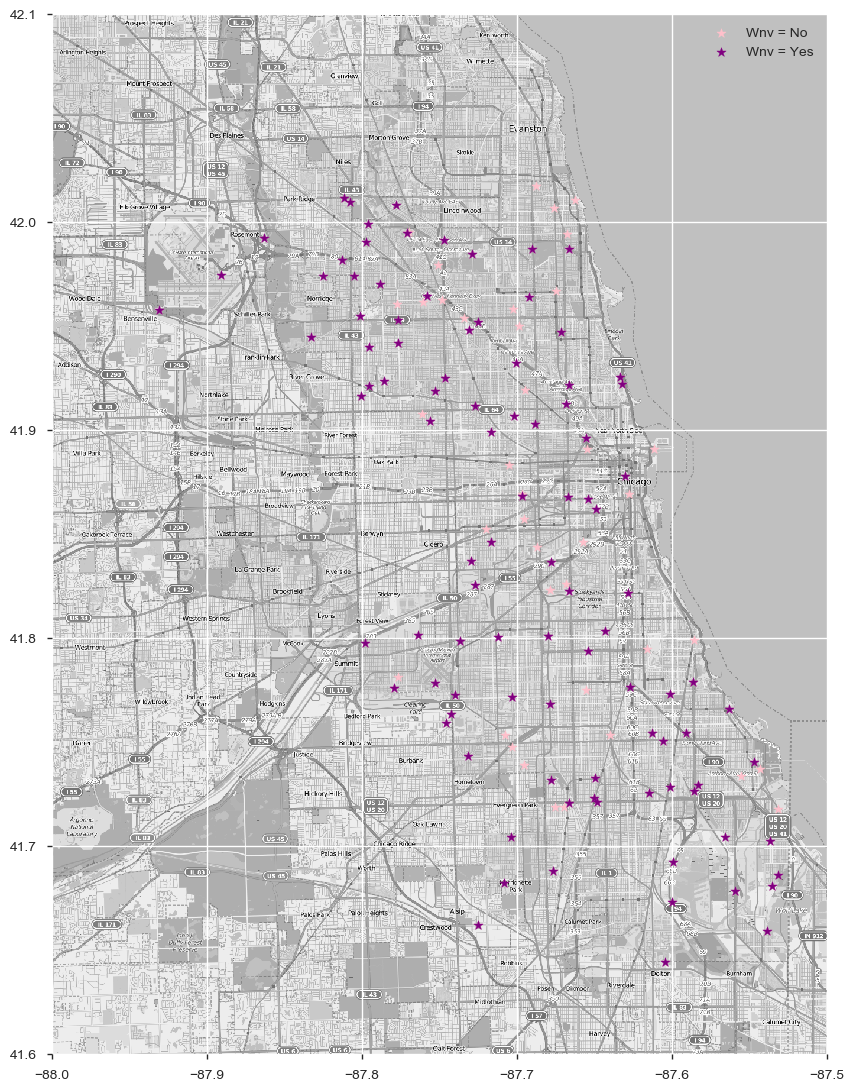

In [139]:
mapdata = np.loadtxt("./mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('./train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata,
          cmap=plt.get_cmap('gray'),
          extent=lon_lat_box,
          aspect=aspect)

traps1 = traps[traps.WnvPresent==1]
traps0 = traps[traps.WnvPresent==0]

traps1 = traps1[['Longitude', 'Latitude']].drop_duplicates().values
traps0 = traps0[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(traps0[:,0], traps0[:,1], color='pink', marker='*', alpha=1, label='Wnv = No');
plt.scatter(traps1[:,0], traps1[:,1], color='purple', marker='*', alpha=1, label='Wnv = Yes');
plt.legend();

plt.savefig('trap_map.png');

## 3. EDA

### 3.1 Join Weather Data to Trap Data

In [37]:
print(len(train),len(weather))

8475 2944


In [38]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [39]:
station1 = weather[weather['Station']==1].copy()
station2 = weather[weather['Station']==2].copy()


#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
station1['Latitude'] = 41.995
station1['Longitude'] = -87.9336

#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station2['Latitude'] = 41.78611
station2['Longitude'] = -87.75222


In [40]:
stations = pd.merge(station1,station2,on='Date',suffixes=('_s1','_s2'))
traps_weather = pd.merge(train,stations,on='Date')

In [41]:
DataInspect(traps_weather)

Dataframe Shape: (8475, 57) 

Duplicate Rows: 0 

Dataframe Types 

 Date                              datetime64[ns]
Address                                   object
Block                                      int64
Street                                    object
Trap                                      object
AddressNumberAndStreet                    object
Latitude                                 float64
Longitude                                float64
AddressAccuracy                            int64
NumMosquitos                               int64
WnvPresent                                 int64
dayofyear                                  int64
Species_CULEX ERRATICUS                    uint8
Species_CULEX PIPIENS                      uint8
Species_CULEX PIPIENS/RESTUANS             uint8
Species_CULEX RESTUANS                     uint8
Species_CULEX SALINARIUS                   uint8
Species_CULEX TARSALIS                     uint8
Species_CULEX TERRITANS                    uint8


Date : 95
Address : 138
Block : 64
Street : 128
Trap : 136
AddressNumberAndStreet : 138
Latitude : 138
Longitude : 138
AddressAccuracy : 4
NumMosquitos : 182
WnvPresent : 2
dayofyear : 77
Species_CULEX ERRATICUS : 2
Species_CULEX PIPIENS : 2
Species_CULEX PIPIENS/RESTUANS : 2
Species_CULEX RESTUANS : 2
Species_CULEX SALINARIUS : 2
Species_CULEX TARSALIS : 2
Species_CULEX TERRITANS : 2
Station_s1 : 1
Tmax_s1 : 33
Tmin_s1 : 33
Tavg_s1 : 31
Depart_s1 : 28
DewPoint_s1 : 32
WetBulb_s1 : 31
Heat_s1 : 14
Cool_s1 : 18
Depth_s1 : 1
SnowFall_s1 : 2
PrecipTotal_s1 : 31
StnPressure_s1 : 38
SeaLevel_s1 : 41
ResultSpeed_s1 : 62
ResultDir_s1 : 34
AvgSpeed_s1 : 61
Latitude_s1 : 1
Longitude_s1 : 1
Station_s2 : 1
Tmax_s2 : 33
Tmin_s2 : 29
Tavg_s2 : 32
Depart_s2 : 1
DewPoint_s2 : 31
WetBulb_s2 : 29
Heat_s2 : 11
Cool_s2 : 22
Depth_s2 : 1
SnowFall_s2 : 1
PrecipTotal_s2 : 28
StnPressure_s2 : 42
SeaLevel_s2 : 42
ResultSpeed_s2 : 61
ResultDir_s2 : 32
AvgSpeed_s2 : 59
Latitude_s2 : 1
Longitude_s2 : 1


### 3.2 Calculate point estimates of weather data at trap location

In [42]:
# calculate distance of traps to weather stations
dist_1 = np.sqrt(((traps_weather['Latitude'] - traps_weather['Latitude_s1'])**2 + 
 (traps_weather['Longitude'] - traps_weather['Longitude_s1'])**2))

dist_2 = np.sqrt(((traps_weather['Latitude'] - traps_weather['Latitude_s2'])**2 + 
 (traps_weather['Longitude'] - traps_weather['Longitude_s2'])**2))

# calculate distance weights to each trap
# to weight the weather data by proximity
total_dist = dist_1 + dist_2
traps_weather['weight_1'] = dist_1 / total_dist
traps_weather['weight_2'] = dist_2 / total_dist

In [43]:
# Apply distance weights to weather data
# Inverse weight because the closer station should have the heavier weight

station1_list = [col for col in traps_weather.columns 
                if '_s1' in col and col not in ('Station_s1','Latitude_s1','Longitude_s1')]
station2_list = [col for col in traps_weather.columns 
                 if '_s2' in col and col not in ('Station_s2','Latitude_s2','Longitude_s2')]

for col in station1_list:
    traps_weather[col] = traps_weather['weight_2'] * traps_weather[col]
for col in station2_list:
    traps_weather[col] = traps_weather['weight_1'] * traps_weather[col]

In [44]:
traps_weather.columns

Index(['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       'WnvPresent', 'dayofyear', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Station_s1',
       'Tmax_s1', 'Tmin_s1', 'Tavg_s1', 'Depart_s1', 'DewPoint_s1',
       'WetBulb_s1', 'Heat_s1', 'Cool_s1', 'Depth_s1', 'SnowFall_s1',
       'PrecipTotal_s1', 'StnPressure_s1', 'SeaLevel_s1', 'ResultSpeed_s1',
       'ResultDir_s1', 'AvgSpeed_s1', 'Latitude_s1', 'Longitude_s1',
       'Station_s2', 'Tmax_s2', 'Tmin_s2', 'Tavg_s2', 'Depart_s2',
       'DewPoint_s2', 'WetBulb_s2', 'Heat_s2', 'Cool_s2', 'Depth_s2',
       'SnowFall_s2', 'PrecipTotal_s2', 'StnPressure_s2', 'SeaLevel_s2',
       'ResultSpeed_s2', 'ResultDir_s2', 'AvgSpeed_s2', 'Latitude_s2',
       'Longitude_s2', 'weig

In [45]:
# we are adding the weighted station1 and station2 weather data
# and dropping the partial columns

for col in [col for col in traps_weather.columns 
            if 's1' in col and col not in ('Station_s1','Latitude_s1','Longitude_s1')]:
    name = col.replace('_s1','')
    traps_weather[name] = traps_weather[col] + traps_weather[name+'_s2']
    traps_weather.drop([col,name+'_s2'],axis=1,inplace=True)

In [46]:
traps_weather.columns

Index(['Date', 'Address', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet',
       'Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos',
       'WnvPresent', 'dayofyear', 'Species_CULEX ERRATICUS',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS', 'Station_s1',
       'Latitude_s1', 'Longitude_s1', 'Station_s2', 'Latitude_s2',
       'Longitude_s2', 'weight_1', 'weight_2', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed'],
      dtype='object')

In [47]:
# Drop station information columns
col1 = [col for col in traps_weather.columns if '_s1' in col]
col2 = [col for col in traps_weather.columns if '_s2' in col]
cols = col1 + col2

traps_weather.drop(cols,axis=1,inplace=True)

### 3.4 Spraying Data

#### Feature Engineering: Calculate Spray in Time and Space from Each Trap Observation

In [49]:
len(spray)

14294

In [50]:
spray.head(3)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [196]:
#WARNING: THIS IS A COMPUTATIONALLY INTENSIVE CELL

# the idea here is that the targeted intervention has an effect that decays in two dimensions, time and distance
# the reference location that we care about is the trap
# so we evaluate spraying by how far the trap is from the where the spraying occurs AND
# we evaluate how long before the trap observation did the spraying occur
# so we calculate the deltas for every spraying against every trap
# if spraying occurred after the observation, we zero out these observations

# should we cross-multiply the distance and time? spraying that is 
# close in both time and distance should be privileged

distance = []
time = []

for i in traps_weather.index:
    temp_lat = traps_weather.at[i,'Latitude']
    temp_long = traps_weather.at[i,'Longitude']

    # calculate distance from traps to spray locations
    dist = np.sqrt((spray['Latitude'] - temp_lat)**2 + (spray['Longitude'] - temp_long)**2)
    distance.append(dist)

    # calculate time since spray
    time_since_spray = traps_weather.at[i,'Date'] - spray['Date']
    time_since_spray = time_since_spray.dt.total_seconds()
    time_since_spray = (((time_since_spray/60)/60)/24)
    time.append(time_since_spray)

distance = pd.DataFrame(distance)
time = pd.DataFrame(time)

time.reset_index(inplace=True)
time.drop('index',axis=1,inplace=True)

backup = time.copy()

In [52]:
# if observation took place before spray, zero out time
# else return elapsed time between spray and observation

for col in time.columns:
    time[col] = time[col].map(lambda x: 0 if x < 0 else x)

In [54]:
time.head()

,0,1,2,3,4,5,6,7,8,9,...,14825,14826,14827,14828,14829,14830,14831,14832,14833,14834
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# join spray distances from traps and spray elapsed time from traps
# we now calculated the distance (time and space) between mosquito spraying and each trap observation
# in the 'data' df, each spray event has a _d (distance from trap) and _t (time from trap) column pair

# data = pd.merge(distance,time,how='inner',left_index=True,right_index=True,suffixes=('_d','_t'))
# data.shape

# # join traps_weather with spraying

# data = pd.merge(traps_weather,data,how='inner',left_index=True,right_index=True)
# data.shape

In [56]:
# multiply elapsed time by spray distance from trap for each spray event
# this creates 1 quantity per spray event, and 
# incorporates both time and distance, the two dimensions spraying decays in

spray_data = [time[i] * distance[i] for i in time.columns]
spray_data = pd.DataFrame(spray_data).transpose()

data = pd.merge(traps_weather,spray_data,how='inner',left_index=True,right_index=True)
data.shape

(8475, 14331)

#### Feature Engineering: Binary Flag - Whether Trap affected by Spraying w/in Last 6 months/0.5 mile

In [212]:
from haversine import haversine

print('starting...')

distance_binary = []
time_binary = []

for i in traps_weather.index:
    temp_lat = traps_weather.at[i,'Latitude']
    temp_long = traps_weather.at[i,'Longitude']

    # calculate distance from traps to spray locations
    dists = []
    if i % 500 == 0:
        print(i)
    for s in spray.index:
        dist = haversine((spray.at[s,'Latitude'],spray.at[s,'Longitude']),(temp_lat,temp_long),miles=True)
        dists.append(dist)
    distance_binary.append(dists)
    
    # calculate time since spray
    time_since_spray = traps_weather.at[i,'Date'] - spray['Date']
    time_since_spray = time_since_spray.dt.total_seconds()
    time_since_spray = (((time_since_spray/60)/60)/24)
    time_binary.append(time_since_spray)

distance_binary = pd.DataFrame(distance_binary)
time_binary = pd.DataFrame(time_binary)

time_binary.reset_index(inplace=True)
time_binary.drop('index',axis=1,inplace=True)

# if observation took place before spray, zero out time
# else return elapsed time between spray and observation

for col in time_binary.columns:
    time_binary[col] = time_binary[col].map(lambda x: 0 if x < 0 else x)
    
# https://chrisalbon.com/python/data_wrangling/pandas_rename_multiple_columns/
time_binary.columns = distance_binary.columns

time_binary_backup = time_binary.copy()
distance_binary_backup = distance_binary.copy()

starting...
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000


AttributeError: 'list' object has no attribute 'columns'

In [236]:
time_tp = time_binary.transpose()
distance_tp = distance_binary.transpose()

binary = pd.merge(distance_tp,time_tp,how='inner',left_index=True,right_index=True,suffixes=('_d','_t'))
binary.shape

(14294, 16950)

In [ ]:
# THIS IS A COMPUTATIONALLY INTENSIVE CELL
# create a bunch of dummy variables to evaluate decaying spray effect

values = []

for i in traps_weather.index:
    observations = []
    if i % 500 == 0:
        print(i)

    d = str(i) + '_d'
    t = str(i) + '_t'
    
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 0.5,binary[d] >= 0),
       np.logical_and(binary[t] <= 7,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 1,binary[d] >= 0),
           np.logical_and(binary[t] <= 7,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 5,binary[d] >= 0),
       np.logical_and(binary[t] <= 7,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
        
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 0.5,binary[d] >= 0),
           np.logical_and(binary[t] <= 30,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 1,binary[d] >= 0),
           np.logical_and(binary[t] <= 30,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 5,binary[d] >= 0),
           np.logical_and(binary[t] <= 30,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)

    if len(binary[np.logical_and(np.logical_and(binary[d] <= 0.5,binary[d] >= 0),
           np.logical_and(binary[t] <= 90,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 1,binary[d] >= 0),
           np.logical_and(binary[t] <= 90,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    if len(binary[np.logical_and(np.logical_and(binary[d] <= 5,binary[d] >= 0),
           np.logical_and(binary[t] <= 90,binary[t] >= 0))]) > 0:
        observations.append(1)
    else:
        observations.append(0)
    values.append(observations)

0
500
1000
1500


In [253]:

spray_col = ['1week_halfmile','1week_1mile','1week_5mile',
            '1month_halfmile','1month_1mile','1month_5mile',
            '1quarter_halfmile','1quarter_1mile','1quarter_5mile']


[[0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0,

In [218]:
traps_weather.head()

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,...,1month_1mile,1month_2mile,1month_5mile,1month_10mile,1quarter_quartermile,1quarter_halfmile,1quarter_1mile,1quarter_2mile,1quarter_5mile,1quarter_10mile
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,...,0,0,1,1,0,0,0,0,1,1
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,...,0,0,1,1,0,0,0,0,1,1
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,1,...,0,0,1,1,0,0,0,0,1,1
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,...,0,1,1,1,0,0,0,1,1,1
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,1,...,1,1,1,1,1,1,1,1,1,1


### 3.5 Export clean data

In [57]:
data.to_csv('cleaned_data.csv')

### 3.6 Train/Test/Split

In [58]:
# path = '/Users/mjschillawski/Google Drive/Data/generalassembly/projects/west_nile_virus/assets/input'
# data = pd.read_csv(path+'/cleaned_data.csv')
# data['Date'] = pd.to_datetime(data['Date'])

In [59]:
data.columns[0:45]

Index([                          'Date',                        'Address',
                                'Block',                         'Street',
                                 'Trap',         'AddressNumberAndStreet',
                             'Latitude',                      'Longitude',
                      'AddressAccuracy',                   'NumMosquitos',
                           'WnvPresent',                      'dayofyear',
              'Species_CULEX ERRATICUS',          'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS',         'Species_CULEX RESTUANS',
             'Species_CULEX SALINARIUS',         'Species_CULEX TARSALIS',
              'Species_CULEX TERRITANS',                       'weight_1',
                             'weight_2',                           'Tmax',
                                 'Tmin',                           'Tavg',
                               'Depart',                       'DewPoint',
                         

In [60]:
data.drop(['Address','Block','Street','Trap',
           'AddressNumberAndStreet','Latitude','Longitude','AddressAccuracy','weight_1',
          'weight_2','Date','NumMosquitos'],axis=1,inplace=True)

In [61]:
from sklearn.model_selection import train_test_split

X = data.drop('WnvPresent',axis=1)
Y = data['WnvPresent']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=20180309,shuffle=True)

In [62]:
from sklearn.model_selection import train_test_split

Xns = data.drop('WnvPresent',axis=1)
Xns = Xns[['dayofyear',        'Species_CULEX ERRATICUS',
                'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
               'Species_CULEX RESTUANS',       'Species_CULEX SALINARIUS',
               'Species_CULEX TARSALIS',        'Species_CULEX TERRITANS',
                                 'Tmax',                           'Tmin',
                                 'Tavg',                         'Depart',
                             'DewPoint',                        'WetBulb',
                                 'Heat',                           'Cool',
                                'Depth',                       'SnowFall',
                          'PrecipTotal',                    'StnPressure',
                             'SeaLevel',                    'ResultSpeed',
                            'ResultDir',                       'AvgSpeed',]]
Yns = data['WnvPresent']

Xns_train,Xns_test,yns_train,yns_test = train_test_split(Xns,Yns,test_size=0.3,random_state=20180309,shuffle=True)

In [63]:
print('overall shape: {} \n'.format(data.shape))
print('X shape: {}'.format(X.shape))
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {} \n'.format(X_test.shape))
print('Y shape: {}'.format(Y.shape))
print('Y_train shape: {}'.format(y_train.shape))
print('Y_test shape: {}'.format(y_test.shape))

overall shape: (8475, 14319) 

X shape: (8475, 14318)
X_train shape: (5932, 14318)
X_test shape: (2543, 14318) 

Y shape: (8475,)
Y_train shape: (5932,)
Y_test shape: (2543,)


## 4. Modeling

We need to predict when, where, and among which species West Nile Virus will occur
In which traps will we observe West Nile Virus?

How to define outcome variable?

Outcome: WNV 1/0

Variable selection:
- weather
- spray
- species
- location-based

### 4.1 Model Imports

In [70]:
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [103]:
def aucroc(probas,y_true,step=0.01):  #,metric='sensitivity',threshold=95
    obs = y_true.values

    sensitivity = []
    specificity = []

    for t in np.arange(0,1,step): #iterate through each step of classification threshold
        
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        
        for i in range(len(y_true)): #iterate through each observation
            predictions = probas[:,1] > t #only predicted class probability

            ##classify each based on whether correctly predicted
            if predictions[i] == 1 and obs[i] == 1:
                TP += 1
            elif predictions[i] == 0 and obs[i] == 1:
                FN += 1
            elif predictions[i] == 1 and obs[i] == 0:
                FP += 1
            elif predictions[i] == 0 and obs[i] == 0:
                TN += 1
        
        #calculate each metric
        sens = TP / (TP + FN)
        spec = TN / (TN + FP)

        #append all metrics to list 
        sensitivity.append(sens)
        specificity.append(1 - spec)

    #graph sens vs spec curve
    plt.rcParams['font.size'] = 14
    plt.plot(specificity,sensitivity,color='cyan')
    plt.plot([0,1],[0,1], color='black', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

### Logistic Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [ ]:
# scaler = StandardScaler()
# Xss_train = scaler.fit_transform(X_train)
# Xss_test = scaler.transform(X_test)


# lm = LogisticRegression(solver='sag',class_weight='balanced',
#                         random_state=20180209,max_iter=500,
#                         n_jobs=-1,verbose=1) 

# print('Cross-validating...')
# lm_scores = cross_val_score(lm,Xss_train,y_train,
#                             cv=3,n_jobs=-1,verbose=1)
# print(lm_scores)
# print('cross val score: {}'.format(np.mean(lm_scores)))
# print('Fitting...')
# lm.fit(X_train,y_train)

# lm_preds = lm.predict(Xss_test)

# tn, fp, fn, tp = confusion_matrix(y_test,lm_preds).ravel()
# print('tn,fp,fn,tp')
# print(tn,fp,fn,tp)

# print('precision score: {}'.format(precision_score(y_test,lm_preds)))

# print(classification_report(y_test,lm_preds))

### KNN

In [ ]:
# scaler = StandardScaler()
# Xss_train = scaler.fit_transform(X_train)
# Xss_test = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=10,weights='distance',n_jobs=-1)

# print('Cross-validating...')
# knn_scores = cross_val_score(knn,Xss_train,y_train,
#                             cv=3,n_jobs=-1,verbose=1)

# print('Fitting')
# knn.fit(Xss_train,y_train)
# knn_preds = knn.predict(Xss_test)

# tn, fp, fn, tp = confusion_matrix(y_test,knn_preds).ravel()
# print('tn,fp,fn,tp')
# print(tn,fp,fn,tp)

# print('precision score: {}'.format(precision_score(y_test,knn_preds)))
# print('recall score: {}'.format(accuracy_score(y_test,knn_preds)))
# print(classification_report(y_test,knn_preds))

### Random Forest (No Spray)

In [94]:
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced_subsample',
                             random_state=20180309,n_jobs=-1,verbose=1)
print('Cross-validating...')
rfc_scores = cross_val_score(rfc,Xns_train,yns_train,
                             cv=3,n_jobs=-1,verbose=1)
print(rfc_scores)
print('cross val score: {}'.format(np.mean(rfc_scores)))

print('Fitting...')
rfc = rfc.fit(Xns_train,yns_train)

rfc_preds = rfc.predict(Xns_test)

tn, fp, fn, tp = confusion_matrix(yns_test,rfc_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}'.format(accuracy_score(yns_test, rfc_preds)))
print('precision score: {}'.format(precision_score(yns_test,rfc_preds)))
print('recall score: {}'.format(accuracy_score(yns_test,rfc_preds)))
print(classification_report(yns_test,rfc_preds))

Cross-validating...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


[ 0.93276036  0.93528817  0.93421053]
cross val score: 0.9340863533961293
Fitting...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s


tn,fp,fn,tp
2321 70 133 19
accuracy score: 0.9201730239874164
precision score: 0.21348314606741572
recall score: 0.9201730239874164
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      2391
          1       0.21      0.12      0.16       152

avg / total       0.90      0.92      0.91      2543



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.737938596491


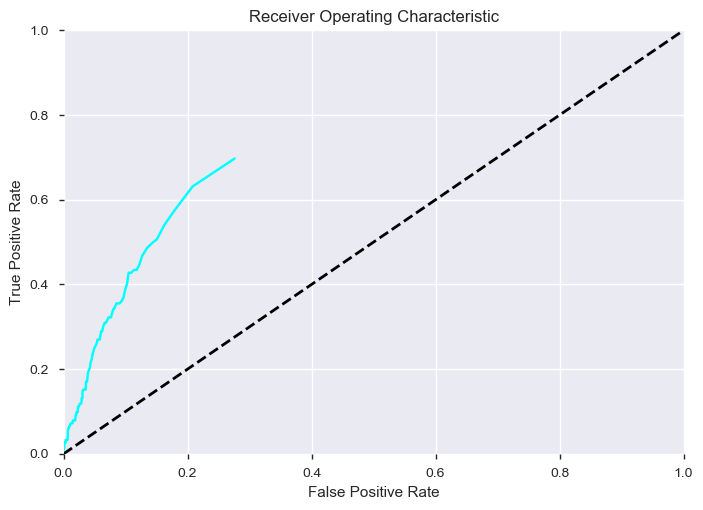

In [98]:
rfcns_probas = rfc.predict_proba(Xns_test)

print(roc_auc_score(yns_test,rfcns_probas[:,1]))
aucroc(rfcns_probas,yns_test)

### Random Forest

In [88]:
rfc = RandomForestClassifier(n_estimators=100,class_weight='balanced_subsample',
                             random_state=20180309,n_jobs=-1,verbose=1)
print('Cross-validating...')
rfc_scores = cross_val_score(rfc,X_train,y_train,
                             cv=3,n_jobs=-1,verbose=1)
print(rfc_scores)
print('cross val score: {}'.format(np.mean(rfc_scores)))

print('Fitting...')
rfc = rfc.fit(X_train,y_train)

rfc_preds = rfc.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,rfc_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}'.format(accuracy_score(y_test, rfc_preds)))
print('precision score: {}'.format(precision_score(y_test,rfc_preds)))
print('recall score: {}'.format(accuracy_score(y_test,rfc_preds)))
print(classification_report(y_test,rfc_preds))

Cross-validating...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   43.1s finished


[ 0.93680485  0.93983822  0.93775304]
cross val score: 0.938132036749726
Fitting...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished


tn,fp,fn,tp
2313 78 126 26
accuracy score: 0.9197797876523791
precision score: 0.25
recall score: 0.9197797876523791
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      2391
          1       0.25      0.17      0.20       152

avg / total       0.91      0.92      0.91      2543



[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.729814655837


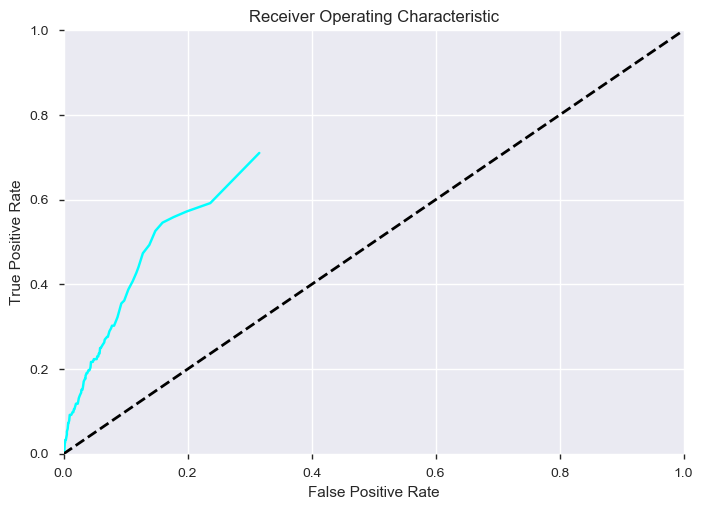

In [89]:
rfc_probas = rfc.predict_proba(X_test)

print(roc_auc_score(y_test,rfc_probas[:,1]))

aucroc(rfc_probas,y_test)

### ExtraTrees (No Spray)

In [105]:
xts = ExtraTreesClassifier(n_estimators=100,class_weight='balanced_subsample',
                             random_state=20180309,n_jobs=-1,verbose=1)
#xts_gscv = GridSearchCV(xts,params,cv=5,n_jobs=-1,verbose=1)

print('Cross-validating...')
xts_scores = cross_val_score(xts,Xns_train,yns_train,
                             cv=3,n_jobs=-1,verbose=1)
print(xts_scores)
print('cross val score: {}'.format(np.mean(xts_scores)))
print('Fitting...')
xts.fit(Xns_train,yns_train)

xtsns_preds = xts.predict(Xns_test)
xtsns_probas = xts.predict_proba(Xns_test)

tn, fp, fn, tp = confusion_matrix(yns_test,xtsns_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(yns_test, xtsns_preds)))
print('precision score: {}'.format(precision_score(yns_test,xtsns_preds)))
print('recall score: {}'.format(accuracy_score(yns_test,xtsns_preds)))
print(classification_report(yns_test,xtsns_preds))

Cross-validating...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished


[ 0.9231547   0.92012133  0.92763158]
cross val score: 0.923635871782591
Fitting...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


tn,fp,fn,tp
2288 103 123 29
accuracy score: 0.9111285882815572:
precision score: 0.2196969696969697
recall score: 0.9111285882815572
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      2391
          1       0.22      0.19      0.20       152

avg / total       0.91      0.91      0.91      2543



0.641103425125


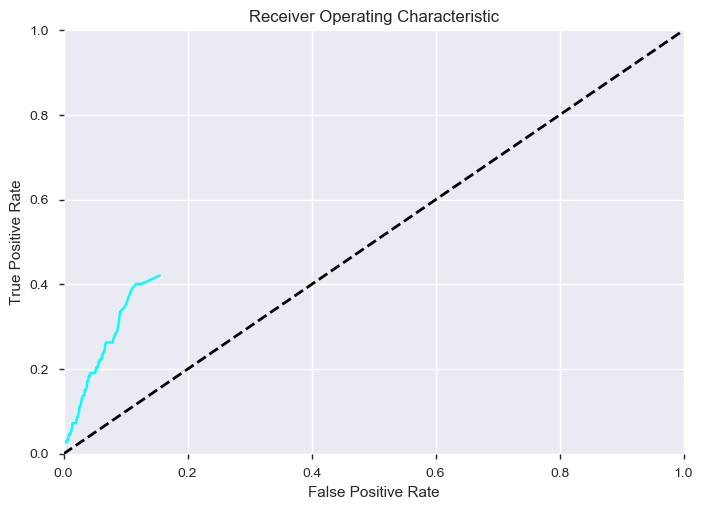

In [107]:
print(roc_auc_score(yns_test,xtsns_probas[:,1]))

aucroc(xtsns_probas,yns_test)

### ExtraTrees

In [110]:
xts = ExtraTreesClassifier(n_estimators=100,class_weight='balanced_subsample',
                             random_state=20180309,n_jobs=-1,verbose=1)
#xts_gscv = GridSearchCV(xts,params,cv=5,n_jobs=-1,verbose=1)

print('Cross-validating...')
xts_scores = cross_val_score(xts,X_train,y_train,
                             cv=3,n_jobs=-1,verbose=1)
print(xts_scores)
print('cross val score: {}'.format(np.mean(xts_scores)))
print('Fitting...')
xts.fit(X_train,y_train)

xts_preds = xts.predict(X_test)
xts_probas = xts.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,xts_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(y_test, xts_preds)))
print('precision score: {}'.format(precision_score(y_test,xts_preds)))
print('recall score: {}'.format(accuracy_score(y_test,xts_preds)))
print(classification_report(y_test,xts_preds))

Cross-validating...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.5s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.3s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.1s finished


[ 0.929727    0.92922144  0.93066802]
cross val score: 0.9298721496515654
Fitting...


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


tn,fp,fn,tp
2291 100 120 32
accuracy score: 0.9134880062917814:
precision score: 0.24242424242424243
recall score: 0.9134880062917814
             precision    recall  f1-score   support

          0       0.95      0.96      0.95      2391
          1       0.24      0.21      0.23       152

avg / total       0.91      0.91      0.91      2543



[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.667204593982


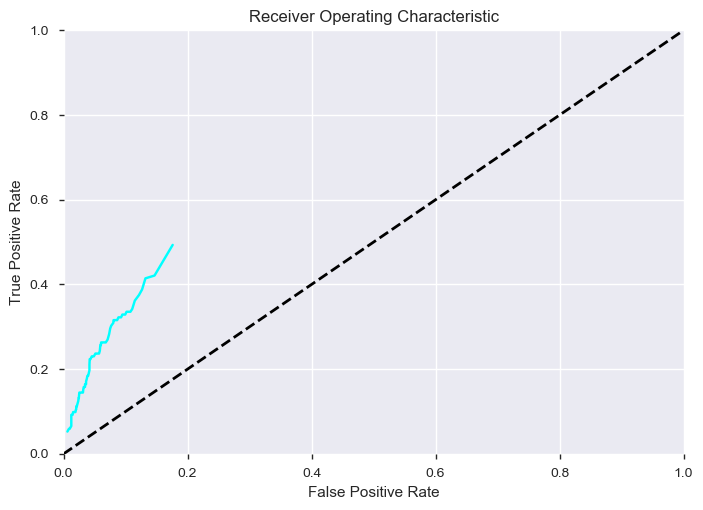

In [114]:
print(roc_auc_score(y_test,xts_probas[:,1]))

aucroc(xts_probas,y_test)

### Support Vector Machine (No Spray)

In [73]:
print('GridSearching...')
svm_params = {'kernel':['linear','rbf','sigmoid']}

svm = SVC(kernel='kernel',class_weight='balanced',
          verbose=1,random_state=20180309,probability=True)
svm_gscv = GridSearchCV(svm,svm_params,
                        n_jobs=-1,verbose=1,cv=3)
print('Fitting...')
svm_gscv.fit(Xns_train,y_train)

print('Scoring...')
svm_scores = svm_gscv.score(Xns_train,y_train)

print(svm_scores)
print('accuracy score: {}'.format(np.mean(svm_scores)))

svm_preds = svm_gscv.best_estimator_.predict(Xns_test)
svm_probas = svm_gscv.best_estimator_.predict_proba(Xns_test)

tn, fp, fn, tp = confusion_matrix(yns_test,svm_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}'.format(accuracy_score(yns_test, svm_preds)))
print('precision score: {}'.format(precision_score(yns_test,svm_preds)))
print('recall score: {}'.format(accuracy_score(yns_test,svm_preds)))
print(classification_report(yns_test,svm_preds))

GridSearching...
Fitting...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    9.2s remaining:   11.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   49.3s finished


[LibSVM]Scoring...
0.746628455833
accuracy score: 0.7466284558327714
tn,fp,fn,tp
1705 686 31 121
accuracy score: 0.7180495477782147
precision score: 0.14993804213135067
recall score: 0.7180495477782147
             precision    recall  f1-score   support

          0       0.98      0.71      0.83      2391
          1       0.15      0.80      0.25       152

avg / total       0.93      0.72      0.79      2543



In [74]:
svm_gscv.best_estimator_

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=20180309, shrinking=True,
  tol=0.001, verbose=1)

0.793130489335


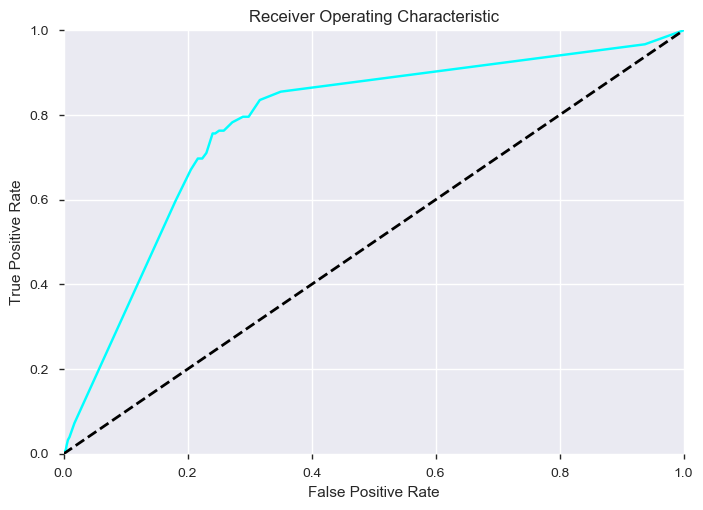

In [80]:
print(roc_auc_score(yns_test,svm_probas[:,1]))

aucroc(svm_probas,yns_test)

### Support Vector Machine

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
print('GridSearching...')
svm_params = {'kernel':['linear','rbf','sigmoid','poly'],
             }

svm = SVC(kernel='kernel',class_weight='balanced',
          verbose=1,random_state=20180309)
svm_gscv = GridSearchCV(svm,svm_params,
                        n_jobs=-1,verbose=1,cv=3)
print('Fitting...')
svm_gscv.fit(X_train,y_train)

print('Scoring...')
svm_scores = svm_gscv.score(X_train,y_train)

print(svm_scores)
print('accuracy score: {}'.format(np.mean(svm_scores)))

svm_preds = svm_gscv.best_estimator_.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,svm_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(y_test, svm_preds)))
print('precision score: {}'.format(precision_score(y_test,svm_preds)))
print('recall score: {}'.format(accuracy_score(y_test,svm_preds)))
print(classification_report(y_test,svm_preds))

In [ ]:
svm_gscv.best_estimator_

In [ ]:
svm_gscv.best_estimator_.dual_coef_

### Gradient Boosting (No Spray)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [129]:
gradboost = GradientBoostingClassifier(n_estimators=800,
                                       verbose=1,
                                       random_state=20180309)

print('Fitting...')
gradboost.fit(Xns_train,yns_train)

print('Scoring...')
gb_scores = gradboost.score(Xns_train,yns_train)

print(gb_scores)
print('accuracy score: {}'.format(np.mean(gb_scores)))

gb_preds = gradboost.predict(Xns_test)
gb_probas = gradboost.predict_proba(Xns_test)

tn, fp, fn, tp = confusion_matrix(yns_test,gb_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(yns_test, gb_preds)))
print('precision score: {}'.format(precision_score(yns_test,gb_preds)))
print('recall score: {}'.format(accuracy_score(yns_test,gb_preds)))
print(classification_report(yns_test,gb_preds))

Fitting...
      Iter       Train Loss   Remaining Time 
         1           0.3890            8.13s
         2           0.3782            8.10s
         3           0.3684            8.04s
         4           0.3608            8.67s
         5           0.3547            8.69s
         6           0.3494            8.69s
         7           0.3450            8.66s
         8           0.3413            8.67s
         9           0.3374            8.83s
        10           0.3343            8.81s
        20           0.3138            8.02s
        30           0.2990            7.59s
        40           0.2892            7.21s
        50           0.2798            7.11s
        60           0.2737            6.90s
        70           0.2686            6.69s
        80           0.2619            6.65s
        90           0.2557            6.53s
       100           0.2511            6.37s
       200           0.2091            5.31s
       300           0.1790            4.53

0.802499504722


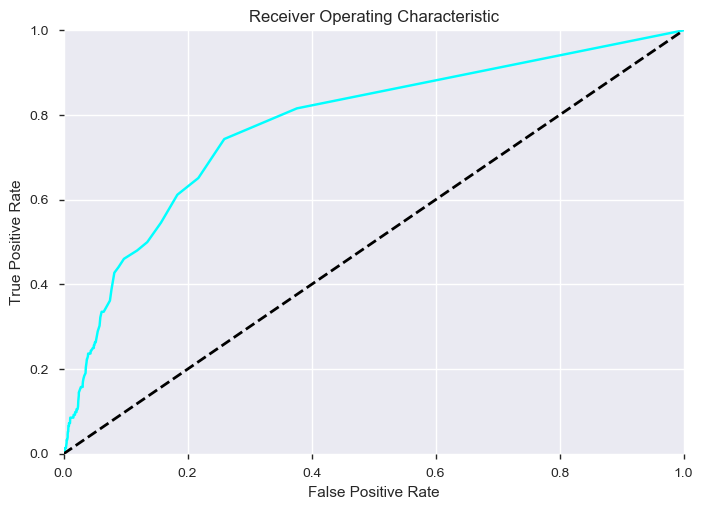

In [130]:
print(roc_auc_score(yns_test,gb_probas[:,1]))

aucroc(gb_probas,yns_test)

### Gradient Boosting

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
gradboost = GradientBoostingClassifier(n_estimators=200,verbose=1,random_state=20180309)

print('Fitting...')
gradboost.fit(X_train,y_train)

print('Scoring...')
gb_scores = gradboost.score(X_train,y_train)

print(gb_scores)
print('accuracy score: {}'.format(np.mean(gb_scores)))

gb_preds = gradboost.predict(X_test)
gb_probas = gradboost.predict_proba(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,gb_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(y_test, gb_preds)))
print('precision score: {}'.format(precision_score(y_test,gb_preds)))
print('recall score: {}'.format(accuracy_score(y_test,gb_preds)))
print(classification_report(y_test,gb_preds))

In [ ]:
print(roc_auc_score(y_test,xts_probas[:,1]))

aucroc(xts_probas,yns_test)

### AdaBoost (No Spray)

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [117]:
ada = AdaBoostClassifier(random_state=20180309)

print('Fitting...')
ada.fit(Xns_train,yns_train)

print('Scoring...')
ada_scores = ada.score(Xns_train,yns_train)

print(ada_scores)
print('accuracy score: {}'.format(np.mean(ada_scores)))

adans_preds = ada.predict(Xns_test)
adans_probas = ada.predict_proba(Xns_test)

tn, fp, fn, tp = confusion_matrix(yns_test,adans_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(y_test, adans_preds)))
print('precision score: {}'.format(precision_score(y_test,adans_preds)))
print('recall score: {}'.format(accuracy_score(y_test,adans_preds)))
print(classification_report(y_test,adans_preds))

Fitting...
Scoring...
0.949426837492
accuracy score: 0.9494268374915711
tn,fp,fn,tp
2388 3 151 1
accuracy score: 0.939441604404247:
precision score: 0.25
recall score: 0.939441604404247
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      2391
          1       0.25      0.01      0.01       152

avg / total       0.90      0.94      0.91      2543



0.806152182527


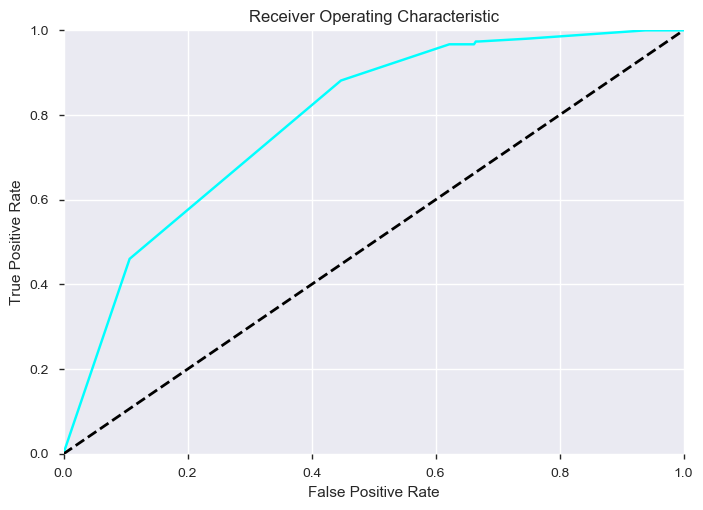

In [118]:
print(roc_auc_score(y_test,adans_probas[:,1]))

aucroc(adans_probas,yns_test)

### Adaboost

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [ ]:
ada = AdaBoostClassifier(random_state=20180309)

print('Fitting...')
ada.fit(X_train,y_train)

print('Scoring...')
ada_scores = ada.score(X_train,y_train)

print(ada_scores)
print('accuracy score: {}'.format(np.mean(ada_scores)))

ada_preds = ada.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test,ada_preds).ravel()
print('tn,fp,fn,tp')
print(tn,fp,fn,tp)

print('accuracy score: {}:'.format(accuracy_score(y_test, ada_preds)))
print('precision score: {}'.format(precision_score(y_test,ada_preds)))
print('recall score: {}'.format(accuracy_score(y_test,ada_preds)))
print(classification_report(y_test,ada_preds))

In [ ]:
print(roc_auc_score(y_test,ada_probas[:,1]))

aucroc(ada_probas,yns_test)

### Neural Network

## 5. Predictions

### Import data

In [ ]:
path = os.getcwd()

if path != '/Users/mjschillawski/Google Drive/Data/generalassembly/projects/west_nile_virus':
    path = '/Users/mjschillawski/Google Drive/Data/generalassembly/projects/west_nile_virus'
else:
    pass
path = path + '/assets/input'
os.chdir(path)

In [ ]:
ls

In [ ]:
#train = pd.read_csv('train.csv')
test_spray = pd.read_csv('spray.csv')
test_weather = pd.read_csv('weather.csv')
test = pd.read_csv('test.csv')

### Data Inspect

In [ ]:
DataInspect(test)

In [ ]:
pdp.ProfileReport(test)

### Fix dates

In [ ]:
#train['Date'] = pd.to_datetime(train['Date'])
test_spray['Date'] = pd.to_datetime(test_spray['Date'])
test_weather['Date'] = pd.to_datetime(test_weather['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [ ]:
test_spray['Date'].describe()

In [ ]:
test['Date'].describe()

In [ ]:
test_weather['Date'].describe()

### Drop duplicates

In [ ]:
# inspect duplicates in spray

print(test.duplicated().sum())
test[test.duplicated(keep=False)]

In [ ]:
# inspect duplicates in spray
print(test_spray.duplicated(keep=False).sum())
test_spray[test_spray.duplicated(keep=False)][:5]

In [ ]:
test_spray.drop(test_spray[test_spray.duplicated(keep='first')].index,axis=0,inplace=True)

In [ ]:
print(len(test))
print(len(test_spray))
print(len(test_weather))

### Fix weather data

In [ ]:
# Changes string T to 0.005, M to 0.0 (11 observations of 2944), and everything else into a float
def rainy_day(column):
    test_weather[column] = test_weather[column].str.replace('T','0.005')
    test_weather[column] = test_weather[column].str.replace('M','0.0')
    test_weather[column] = test_weather[column].astype(float)

In [ ]:
for col in ['Tavg','PrecipTotal','Depart','WetBulb','SnowFall',
            'StnPressure','SeaLevel','Depth','AvgSpeed','Heat','Cool']:
    rainy_day(col)

In [ ]:
#All Tavg values that were missing (changed to 0 with rainy_day function) are given values from min/max
test_weather['Tavg'][test_weather.Tavg==0] = (test_weather['Tmin'] + test_weather['Tmax']) / 2
test_weather['Tavg'].value_counts()

### Make numeric

In [ ]:
cols = [col for col in test_weather.columns if col not in ('Station','Date')]

bad_col = []

for col in cols:
    try:
        test_weather[col] = pd.to_numeric(test_weather[col])
    except:
        bad_col.append(col)
print(bad_col)

In [ ]:
test_weather.drop('CodeSum',axis=1,inplace=True)
bad_col.remove('CodeSum')

In [ ]:
bad_data = {}

for col in bad_col:
    z = []
    for i in test_weather[col]:
        try:
            pd.to_numeric(i)
        except:
            if i in z:
                pass
            else:
                z.append(i)
    bad_data[col] = z
bad_data

In [ ]:
test_weather[bad_col].describe()

In [ ]:
test_weather.drop(bad_col,axis=1,inplace=True)

### Aggregate traps

We are not going to aggregate traps in the test data. In the test data, there are no quantities of mosquitoes, so there's no value to aggregating traps. Any duplicates **should** receive the same probability score. 

In [ ]:
# aggregate trap observations by date and species
# observations are split when n_mosquitoes > 50
# rebuild trap observations
# inspect whether both observations are flagged as 1 / 0 or not
# whether to replace 1 across both if true

print(test.duplicated(['Date','Species','Trap']).sum())

test[test.duplicated(['Date','Species','Trap'],keep=False)].sort_values(['Date','Trap','Species'])

### Date Engineering

In [ ]:
# need to do something that incorporates date information
# probably categorical?
# other options? seasonal, weekly
# continuous but circular

# continuous, as day of year
test["dayofyear"] = test['Date'].dt.dayofyear

# month
# train['month'] = train['Date'].dt.month

# quarter
# train['quarter'] = train['Date'].dt.quarter

### Dummy species

In [ ]:
# get dummies for mosquito species

test = pd.get_dummies(test, columns=['Species'])

### Join weather data to trap data

In [ ]:
print(len(test),len(test_weather))

In [ ]:
test_weather.columns

In [ ]:
station1 = test_weather[test_weather['Station']==1].copy()
station2 = test_weather[test_weather['Station']==2].copy()


#Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
station1['Latitude'] = 41.995
station1['Longitude'] = -87.9336

#Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level
station2['Latitude'] = 41.78611
station2['Longitude'] = -87.75222

In [ ]:
stations = pd.merge(station1,station2,on='Date',suffixes=('_s1','_s2'))
testtrapsweather = pd.merge(test,stations,on='Date')

In [ ]:
DataInspect(testtrapsweather)

### Calculate point estimates of weather data at trap location

In [ ]:
# calculate distance of traps to weather stations
dist_1 = np.sqrt(((testtrapsweather['Latitude'] - testtrapsweather['Latitude_s1'])**2 + 
 (testtrapsweather['Longitude'] - testtrapsweather['Longitude_s1'])**2))

dist_2 = np.sqrt(((testtrapsweather['Latitude'] - testtrapsweather['Latitude_s2'])**2 + 
 (testtrapsweather['Longitude'] - testtrapsweather['Longitude_s2'])**2))

# calculate distance weights to each trap
# to weight the weather data by proximity
total_dist = dist_1 + dist_2
testtrapsweather['weight_1'] = dist_1 / total_dist
testtrapsweather['weight_2'] = dist_2 / total_dist

In [ ]:
# Apply distance weights to weather data
# Inverse weight because the closer station should have the heavier weight

station1_list = [col for col in testtrapsweather.columns 
                if '_s1' in col and col not in ('Station_s1','Latitude_s1','Longitude_s1')]
station2_list = [col for col in testtrapsweather.columns 
                 if '_s2' in col and col not in ('Station_s2','Latitude_s2','Longitude_s2')]

for col in station1_list:
    testtrapsweather[col] = testtrapsweather['weight_2'] * testtrapsweather[col]
for col in station2_list:
    testtrapsweather[col] = testtrapsweather['weight_1'] * testtrapsweather[col]

In [ ]:
testtrapsweather.columns

In [ ]:
# we are adding the weighted station1 and station2 weather data
# and dropping the partial columns

for col in [col for col in testtrapsweather.columns 
            if 's1' in col and col not in ('Station_s1','Latitude_s1','Longitude_s1')]:
    name = col.replace('_s1','')
    testtrapsweather[name] = testtrapsweather[col] + testtrapsweather[name+'_s2']
    testtrapsweather.drop([col,name+'_s2'],axis=1,inplace=True)

In [ ]:
testtrapsweather.columns

In [ ]:
# Drop station information columns
col1 = [col for col in testtrapsweather.columns if '_s1' in col]
col2 = [col for col in testtrapsweather.columns if '_s2' in col]
cols = col1 + col2

testtrapsweather.drop(cols,axis=1,inplace=True)

In [ ]:
testtrapsweather.columns

### Spraying data

For now, we will ignore spray data as it's not included in the best model

In [ ]:
len(test_spray)

In [ ]:
test_spray.head(3)

In [ ]:

#WARNING: THIS IS A COMPUTATIONALLY INTENSIVE CELL

# the idea here is that the targeted intervention has an effect that decays in two dimensions, time and distance
# the reference location that we care about is the trap
# so we evaluate spraying by how far the trap is from the where the spraying occurs AND
# we evaluate how long before the trap observation did the spraying occur
# so we calculate the deltas for every spraying against every trap
# if spraying occurred after the observation, we zero out these observations

# should we cross-multiply the distance and time? spraying that is 
# close in both time and distance should be privileged

distance = []
time = []

for i in testtrapsweather.index:
    temp_lat = testtrapsweather.at[i,'Latitude']
    temp_long = testtrapsweather.at[i,'Longitude']

    # calculate distance from traps to spray locations
    dist = np.sqrt((test_spray['Latitude'] - temp_lat)**2 + (test_spray['Longitude'] - temp_long)**2)
    distance.append(dist)

    # calculate time since spray
    time_since_spray = testtrapsweather.at[i,'Date'] - test_spray['Date']
    time_since_spray = time_since_spray.dt.total_seconds()
    time_since_spray = (((time_since_spray/60)/60)/24)
    time.append(time_since_spray)

distance = pd.DataFrame(distance)
time = pd.DataFrame(time)

time.reset_index(inplace=True)
time.drop('index',axis=1,inplace=True)

backup = time.copy()

In [ ]:
# if observation took place before spray, zero out time
# else return elapsed time between spray and observation

for col in time.columns:
    time[col] = time[col].map(lambda x: 0 if x < 0 else x)

In [ ]:
distance.head(3)

In [ ]:
time.head(3)

In [ ]:
# multiply elapsed time by spray distance from trap for each spray event
# this creates 1 quantity per spray event, and 
# incorporates both time and distance, the two dimensions spraying decays in

test_spray_data = [time[i] * distance[i] for i in time.columns]
test_spray_data = pd.DataFrame(test_spray_data).transpose()

clean_test_data = pd.merge(testtrapsweather,test_spray_data,how='inner',left_index=True,right_index=True)

### Export clean test data

In [ ]:
clean_test_data = testtrapsweather.copy()

In [ ]:
clean_test_data.to_csv('clean_test_data.csv')

In [131]:
clean_test_data = pd.read_csv('clean_test_data.csv')

In [ ]:
clean_test_data.columns[0:45]

### Scoring

In [132]:
Xns_testing = clean_test_data[['dayofyear',        'Species_CULEX ERRATICUS',
                'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
               'Species_CULEX RESTUANS',       'Species_CULEX SALINARIUS',
               'Species_CULEX TARSALIS',        'Species_CULEX TERRITANS',
                                 'Tmax',                           'Tmin',
                                 'Tavg',                         'Depart',
                             'DewPoint',                        'WetBulb',
                                 'Heat',                           'Cool',
                                'Depth',                       'SnowFall',
                          'PrecipTotal',                    'StnPressure',
                             'SeaLevel',                    'ResultSpeed',
                            'ResultDir',                       'AvgSpeed']]


In [ ]:
# model_name = 'svm1'
# svm_probas = svm_gscv.best_estimator_.predict_proba(Xns_test)

len(svm_probas)

In [135]:
# model_name = 'gb1'
# gb_probas = gradboost.predict_proba(Xns_testing)

len(gb_probas)

In [136]:
ids = clean_test_data['Id']

predictions = pd.DataFrame(gb_probas[:,1],index=ids)
predictions.rename(columns={0:'WnvPresent'},inplace=True)

In [137]:
path = '/Users/mjschillawski/Google Drive/Data/generalassembly/projects/west_nile_virus/assets/output'
predictions.to_csv(path+'predictions_'+model_name+'.csv')